In [23]:
import pandas as pd
from pandas import read_csv
from os import path
import boto3
from collections import OrderedDict
import numpy 
import matplotlib.pyplot as plt
#from sklearn.preprocessing import Imputer

from pandas import DataFrame

from random import randint, sample, seed
seed(83)
sample_moments = sorted(sample(range(18446744073709), 2000))
#snapshot_moment = randint(1985035622061, 18446744073709551615)
#print (snapshot_moment)

tasks_dict = {}
samples_dicts = OrderedDict([])
sample_moments_iterator = iter(sample_moments)
current_sample_moment = next(sample_moments_iterator)
tasks_df = None





task_events_csv_colnames = ['time', 'missing', 'job_id', 'task_idx', 'machine_id', 'event_type', 'user', 'sched_cls', 
                            'priority', 'cpu_requested', 'mem_requested', 'disk', 'restriction']  
s3client = boto3.client('s3')
bucket = 'googlecloudtracenew'
startAfter = 'clusterdata-2011-2/task_events/'
theobjects = s3client.list_objects_v2(Bucket=bucket, StartAfter=startAfter )

%time
for object in theobjects['Contents']:
    fn = object['Key']
    
    fp = path.join('s3://googlecloudtracenew',fn)
    print (fp)
    
    task_events_df_missing = pd.read_csv(fp, compression='gzip', sep='\s*,\s*', engine='python', header=None, index_col=False, names=task_events_csv_colnames, encoding="utf-8-sig")
    task_events_df = task_events_df_missing[task_events_df_missing['cpu_requested'].notnull() & task_events_df_missing['mem_requested'].notnull()]
#    df[df['age'].notnull() & df['sex'].notnull()]
    #print(task_events_df)
    print (max(task_events_df['time']))
    for index, event in task_events_df.iterrows():
       
        if current_sample_moment is not None and event['time'] > current_sample_moment:
            print (current_sample_moment)
            print (event['time'])
            print (event['event_type'])
            
            
            #print(tasks_dict.values())
            tmp_tasks_df = pd.DataFrame(list(tasks_dict.values()))
            #print(tmp_tasks_df['cpu_requested'])
            #print('tmp_tasks_df[cpu_requested]')
                                        #columns=['task_id', 'machine_id', 'cpu_requested', 'mem_requested'])
           
            samples_dicts[current_sample_moment] = ({'time' : current_sample_moment, 
                                                 'cpu_requested' : sum(tmp_tasks_df['cpu_requested']), 
                                                 'mem_requested' : sum(tmp_tasks_df['mem_requested'])})
            #print(samples_dicts[current_sample_moment])
            #print('samples_dicts[current_sample_moment]')
            
            
            try:
                current_sample_moment = next(sample_moments_iterator)
            except StopIteration:
                current_sample_moment = None
                
        if tasks_df is None and event['time'] > snapshot_moment:
            #print ('tasks df')
            tasks_df = pd.DataFrame(list(tasks_dict.values()))
                                    #columns=['task_id', 'machine_id','cpu_requested', 'mem_requested'])
            #print(tasks_df)
            
        if event['event_type'] in [0, 7, 8]:
            #print ('events type, tasks_dict')
            tasks_dict[(event['job_id'], event['task_idx'])] = {'task_id': (event['job_id'], event['task_idx']),
                                                                'machine_id': event['machine_id'],
                                                                'cpu_requested': event['cpu_requested'], 
                                                                'mem_requested': event['mem_requested']}
            #print('tasks_dict')
            #print(tasks_dict[(event['job_id'], event['task_idx'])])
            
            #tmp_tasks_df1 = pd.DataFrame(list(tasks_dict.values()))
            #print(tmp_tasks_df1)
            #print('tmp_tasks_df1')
                                   
            
        
        elif event['event_type'] in [2, 3, 4, 5, 6]:
            try:
                del tasks_dict[(event['job_id'], event['task_idx'])]
            except KeyError:
                pass
        
            
    if tasks_df is not None and current_sample_moment is None:
        #print(current_sample_moment)
        break
        
#print(samples_dicts.values())
                    
#samples_df = pd.DataFrame([samples_dicts.values()])
samples_df = pd.DataFrame(list(samples_dicts.values()))

#print (samples_dicts)
#print (tasks_dict)

#print (tasks_df)
print ('Sampled dataframe for task_events')
print (samples_df)
print

%time
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(samples_df['time'], samples_df['cpu_requested'], label='cpu requested')
ax.plot(samples_df['time'], samples_df['mem_requested'], label='mem requested')
plt.xlim(min(samples_df['time']), max(samples_df['time']))
plt.legend()
plt.show()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 11.2 µs
s3://googlecloudtracenew/clusterdata-2011-2/task_events/part-00396-of-00500.csv.gz
1990045853827
3764746071
1985035622061
2


KeyError: 'cpu_requested'

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.58 µs


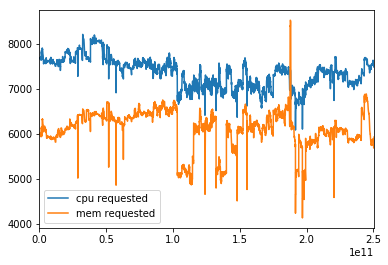

In [2]:
%time
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(samples_df['time'], samples_df['cpu_requested'], label='cpu requested')
ax.plot(samples_df['time'], samples_df['mem_requested'], label='mem requested')
plt.xlim(min(samples_df['time']), max(samples_df['time']))
plt.legend()
plt.show()

s3://googlecloudtracenew/clusterdata-2011-2/machine_events/part-00000-of-00001.csv.gz
Sampled machine data
      cpu_available  cpu_requested  mem_available  mem_requested          time
0           6603.25    7673.625487     5862.75133    6000.030169      21267924
1           6602.75    7673.625487     5862.50203    6000.030169      79988487
2           6602.75    7673.600497     5862.50203    5999.950579      86165585
3           6601.75    7673.575507     5861.50203    5999.870989      86498816
4           6601.25    7673.550517     5861.00253    5999.791399      87113392
5           6600.75    7673.525527     5860.75323    5999.711809     131872282
6           6600.75    7673.500537     5860.75323    5999.632219     158677754
7           6600.25    7673.475547     5860.25373    5999.552629     179688964
8           6600.75    7673.450557     5860.75323    5999.473039     186396054
9           6600.75    7673.425567     5860.75323    5999.393449     200338879
10          6601.25    7

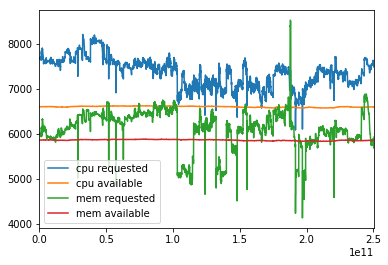

In [3]:
import pandas as pd
from pandas import read_csv
from os import path
import boto3
from collections import OrderedDict
import numpy 
import matplotlib.pyplot as plt
from pandas import DataFrame

machines_dict = {}
sample_moments_iterator = iter(sample_moments)
current_sample_moment = next(sample_moments_iterator)
machines_df = None

machine_events_csv_colnames=['time', 'machine_id', 'event_type', 'platform_id', 'cpu', 'mem']


s3client = boto3.client('s3')
bucket = 'googlecloudtracenew'
startAfter = 'clusterdata-2011-2/machine_events/'
theobjects = s3client.list_objects_v2(Bucket=bucket, StartAfter=startAfter )

#%time
for object in theobjects['Contents']:
    #print (object['Key'])

#for fn in sorted(listdir('s3://googlecloudtrace/clusterdata-2011-2/task_usage')):

    #fp = path.join('s3://googlecloudtrace/clusterdata-2011-2/task_usage', fn)
    fn = object['Key']
    
    fp = path.join('s3://googlecloudtracenew',fn)
    print (fp)
    machine_events_df_missing = read_csv(fp, header=None, index_col=False, compression='gzip', names=machine_events_csv_colnames, sep='\s*,\s*', engine='python', encoding="utf-8-sig")
    machine_events_df = machine_events_df_missing[machine_events_df_missing['cpu'].notnull() & machine_events_df_missing['mem'].notnull()]
    for index, event in machine_events_df.iterrows():
        
        if current_sample_moment is not None and event['time'] > current_sample_moment:
            tmp_machines_df = pd.DataFrame(list(machines_dict.values()))
            samples_dicts[current_sample_moment].update({'cpu_available' : sum(tmp_machines_df['cpu']), 
                                                         'mem_available' : sum(tmp_machines_df['mem'])})
            try:
                current_sample_moment = next(sample_moments_iterator)
            except StopIteration:
                current_sample_moment = None
                
        if machines_df is None and event['time'] > snapshot_moment: 
            machines_df = pd.DataFrame(list(machines_dict.values()))
            
        if event['event_type'] in [0, 2]:
            machines_dict[event['machine_id']] = {'machine_id' : event['machine_id'], 
                                                  'cpu' : event['cpu'], 'mem' : event['mem']}
        elif event['event_type'] in [1]:
            try:
                del machines_dict[event['machine_id']]
            except KeyError:
                pass

    if machines_df is not None and current_sample_moment is None:
        break
                    
#machines_df = pd.DataFrame(machines_dict.values())
samples_df = pd.DataFrame(list(samples_dicts.values()))

#print machines_df
#print
print ('Sampled machine data')
print (samples_df)

%time
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(samples_df['time'], samples_df['cpu_requested'], label='cpu requested')
ax.plot(samples_df['time'], samples_df['cpu_available'], label='cpu available')
ax.plot(samples_df['time'], samples_df['mem_requested'], label='mem requested')
ax.plot(samples_df['time'], samples_df['mem_available'], label='mem available')
plt.xlim(min(samples_df['time']), max(samples_df['time']))
plt.legend()
plt.show()



In [4]:
import pandas as pd
from pandas import read_csv
from os import path
import boto3
from collections import OrderedDict
import numpy 
import matplotlib.pyplot as plt
from pandas import DataFrame

tasks_dict = {}



task_usage_csv_colnames=['starttime', 'endtime', 'job_id', 'task_idx', 'machine_id', 'cpu_usage', 'mem_usage', 
                         'assigned_mem', 'unmapped_cache_usage', 'page_cache_usage', 'max_mem_usage', 'disk_io_time', 
                         'max_disk_space', 'max_cpu_usage', 'max_disk_io_time', 'cpi', 'mai', 'sampling_rate', 'agg_type']

for moment in samples_dicts:
    samples_dicts[moment].update({'cpu_usage' : 0.0, 'mem_usage' : 0.0})
    
for task in tasks_dict:
    tasks_dict[task].update({'cpu_usage' : 0.0, 'mem_usage' : 0.0, 'in_events' : True, 'in_usage' : False})
    
    
s3client = boto3.client('s3')
bucket = 'googlecloudtracenew'
startAfter = 'clusterdata-2011-2/task_usage/'
theobjects = s3client.list_objects_v2(Bucket=bucket, StartAfter=startAfter )

%time
for object in theobjects['Contents']:
    #print (object['Key'])

#for fn in sorted(listdir('s3://googlecloudtrace/clusterdata-2011-2/task_usage')):

    #fp = path.join('s3://googlecloudtrace/clusterdata-2011-2/task_usage', fn)
    fn = object['Key']
    
    fp = path.join('s3://googlecloudtracenew',fn)
    print (fp)
    
    

    
    task_usage_df_missing = read_csv(fp, header=None, index_col=False, compression='gzip', names=task_usage_csv_colnames, engine='python', encoding="utf-8-sig")
    task_usage_df = task_usage_df_missing[task_usage_df_missing['cpu_usage'].notnull() & task_usage_df_missing['mem_usage'].notnull()]
    laststart = max(task_usage_df['starttime'])
    if laststart > max(sample_moments) and laststart > snapshot_moment:
        #print ('laststart loop')
        #print (laststart)
        break
        
    for moment in samples_dicts:
        #print ('task_usage_moment_df loop')
        task_usage_moment_df = task_usage_df[(task_usage_df['starttime'] <= moment) & 
                                             (moment <= task_usage_df['endtime'])]
        samples_dicts[moment]['cpu_usage'] += sum(task_usage_moment_df['cpu_usage'])
        samples_dicts[moment]['mem_usage'] += sum(task_usage_moment_df['mem_usage'])
        #print(task_usage_moment_df)

    task_usage_snapshot_df = task_usage_df[(task_usage_df['starttime'] <= snapshot_moment) &
                                           (snapshot_moment <= task_usage_df['endtime'])]
    #print (task_usage_snapshot_df)
    for index, usage in task_usage_snapshot_df.iterrows():
        #print ('index')
        #print(index)
        #print('usage')
        #print(usage)
        task_id = (usage['job_id'], usage['task_idx'])
        if task_id in tasks_dict:
            tasks_dict[task_id].update({'cpu_usage' : usage['cpu_usage'], 'mem_usage' : usage['mem_usage'], 
                                        'in_events': True, 'in_usage' : True})
            #print ('filling tasks_dict if')
        else:
           # print('filling tasks_dict else')
            tasks_dict[task_id] = {'cpu_requested' : 0.0, 'mem_requested' : 0.0, 
                                   'cpu_usage' : usage['cpu_usage'], 'mem_usage' : usage['mem_usage'],
                                   'in_events' : False, 'in_usage' : True}


#print (samples_dicts)
print ('Sampled data for task usage')
samples_df = pd.DataFrame(list(samples_dicts.values()))
print (samples_df)
#tasks_df = DataFrame(tasks_dict.values())
#print tasks_df

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.15 µs
s3://googlecloudtracenew/clusterdata-2011-2/task_usage/part-00000-of-00500.csv.gz
s3://googlecloudtracenew/clusterdata-2011-2/task_usage/part-00001-of-00500.csv.gz
s3://googlecloudtracenew/clusterdata-2011-2/task_usage/part-00002-of-00500.csv.gz
s3://googlecloudtracenew/clusterdata-2011-2/task_usage/part-00003-of-00500.csv.gz
s3://googlecloudtracenew/clusterdata-2011-2/task_usage/part-00004-of-00500.csv.gz
s3://googlecloudtracenew/clusterdata-2011-2/task_usage/part-00005-of-00500.csv.gz
s3://googlecloudtracenew/clusterdata-2011-2/task_usage/part-00006-of-00500.csv.gz
s3://googlecloudtracenew/clusterdata-2011-2/task_usage/part-00007-of-00500.csv.gz
s3://googlecloudtracenew/clusterdata-2011-2/task_usage/part-00008-of-00500.csv.gz
s3://googlecloudtracenew/clusterdata-2011-2/task_usage/part-00009-of-00500.csv.gz
s3://googlecloudtracenew/clusterdata-2011-2/task_usage/part-00010-of-00500.csv.gz
s3://googlecloudtracenew/clusterda

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 15.5 µs


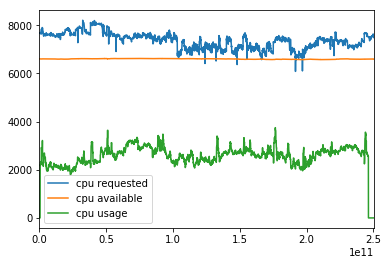

In [5]:
%time
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(samples_df['time'], samples_df['cpu_requested'], label='cpu requested')
ax.plot(samples_df['time'], samples_df['cpu_available'], label='cpu available')
ax.plot(samples_df['time'], samples_df['cpu_usage'], label='cpu usage')
plt.xlim(min(samples_df['time']), max(samples_df['time']))
plt.legend()
plt.show()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.63 µs


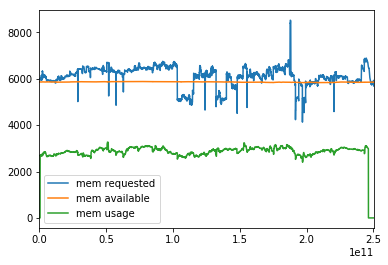

In [6]:
%time
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(samples_df['time'], samples_df['mem_requested'], label='mem requested')
ax.plot(samples_df['time'], samples_df['mem_available'], label='mem available')
ax.plot(samples_df['time'], samples_df['mem_usage'], label='mem usage')
plt.xlim(min(samples_df['time']), max(samples_df['time']))
plt.legend()
plt.show()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 12.4 µs


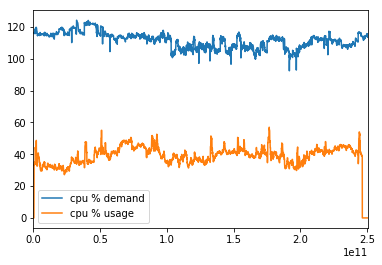

In [7]:
%time
demand_pct = [100.0 * cpur / cpua for cpur, cpua in zip(samples_df['cpu_requested'], samples_df['cpu_available'])]
usage_pct = [100.0 * cpuu / cpua for cpuu, cpua in zip(samples_df['cpu_usage'], samples_df['cpu_available'])]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(samples_df['time'], demand_pct, label='cpu % demand')
ax.plot(samples_df['time'], usage_pct, label='cpu % usage')
plt.xlim(min(samples_df['time']), max(samples_df['time']))
plt.legend()
plt.show()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 11 µs


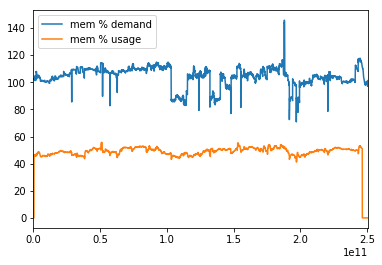

In [8]:
%time
demand_pct = [100.0 * memr / mema for memr, mema in zip(samples_df['mem_requested'], samples_df['mem_available'])]
usage_pct = [100.0 * memu / mema for memu, mema in zip(samples_df['mem_usage'], samples_df['mem_available'])]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(samples_df['time'], demand_pct, label='mem % demand')
ax.plot(samples_df['time'], usage_pct, label='mem % usage')
plt.xlim(min(samples_df['time']), max(samples_df['time']))
plt.legend()
plt.show()


In [9]:
samples_df.to_csv('samplesdf.csv')

In [10]:
print (samples_df)

      cpu_available  cpu_requested    cpu_usage  mem_available  mem_requested  \
0           6603.25    7673.625487     0.000000     5862.75133    6000.030169   
1           6602.75    7673.625487     0.000000     5862.50203    6000.030169   
2           6602.75    7673.600497     0.000000     5862.50203    5999.950579   
3           6601.75    7673.575507     0.000000     5861.50203    5999.870989   
4           6601.25    7673.550517     0.000000     5861.00253    5999.791399   
5           6600.75    7673.525527     0.000000     5860.75323    5999.711809   
6           6600.75    7673.500537     0.000000     5860.75323    5999.632219   
7           6600.25    7673.475547     0.000000     5860.25373    5999.552629   
8           6600.75    7673.450557     0.000000     5860.75323    5999.473039   
9           6600.75    7673.425567     0.000000     5860.75323    5999.393449   
10          6601.25    7673.363067     0.000000     5861.00253    5999.387231   
11          6601.25    7673.